### Clase_06_Numpy y linalg_.ipynb

In [10]:
import numpy as np
import matplotlib.pyplot as plt

ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [7]:
# tu codigo aqui (~ 5 lineas de codigo):
a = np.linspace(0,0.5,6)
b = np.linspace(0.51,0.59,9)
c = np.linspace(0.6,1,5)
x = np.hstack((a,b,c))
print(x)


[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


Ejercicio (parte de tarea) En este caso usamos un ciclo para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for.

tip: usar slicing

In [8]:
sample_points = 100000 #10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

A =  y.copy()
B = np.insert(A, 0, 0)
B= np.delete(B, np.s_[-1:])
C = A[1:]
C = np.append(C,0)

ys = (A+B+C)/3

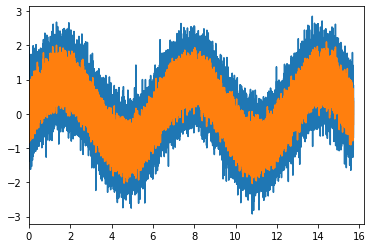

In [11]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)#limieteX
plt.show()

Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

S=−∑inP(xi)log2P(xi)


In [12]:
# tu codigo aqui (~ 4 lineas de codigo)
def entropia(px):
    return  px*np.log2(px)*-1 

R = np.array([0.25,0.75])
print (entropia(R))


[0.5        0.31127812]


Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
c(x)=(x2+x+log(0.0001x)−0.54x−−−−−√)/100 

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
g = función que estima la ganancia en función de x
c = función que estima el costo en función de x
La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
c(x)=(x2+x+log(0.0001x)−0.54x−−−−−√)/100 

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
g = función que estima la ganancia en función de x
c = función que estima el costo en función de x
La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [17]:
def ganancia2(x):
  ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
  return ganancia #np.power(x,2)

def costos(x):
  Cost = (np.power(x,2)+x+np.log2(0.0001*x))-np.sqrt(0.54*x)/100
  return Cost#np.sqrt(x)

def ganancia_neta(x,g,c):
  return g(x) - c(x)

In [18]:
gastos = np.array([100,50,25,100]) 
print(ganancia_neta(gastos,ganancia2,costos))


[10306.45469917    57.51591796  -303.94077276 10306.45469917]


En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

Ejemplo aplicado En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [19]:
def lifetime_value(ganancias_mensuales):
    return np.cumsum(ganancias_mensuales)
    pass
# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


Ejercicio Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [21]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    a,b = np.unique(x, return_counts=True)
    index = np.argmax(b)
    return (a[index])
    
    pass

x = np.array([1,2,3,4,5,6,7,8,9,2,2])
print(mode(x))

2


Ejercicio : crear una función para calcular la entropía de una distribución de probabilidad representada como un vector.
S=−∑inP(xi)log2P(xi) 

Nota: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

recordatorio: no usar ciclos solo operaciones vectorizadas.

In [39]:
def Entropia(x):
  Yx= x*np.log2(x)*-1 
  A= np.sum(Yx)
  return(A)
  

R = np.array([0.25,0.75])
print(Entropia(R))




0.8112781244591328


### Investigación
Proyección vectorial
Es de el extremo del vector que queremos obtener la proyección trazamos una perpendicular del vector sobre el que queremos proyectarlo. Luego, en ese mismo vector, trazamos un nuevo vector desde el origen hasta el punto donde se corta con la recta perpendicular.

    Definir una función para calculo en numpy
     interpretación
    aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser útil.

Producto cruz
    calculo en numpy
    interpretación
    aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo


In [56]:
d= np.array([2, 5, 8])        
n = np.array([1, 1, 7])        
n_norm = np.sqrt(sum(v**2))   
   
x = (np.dot(u, n)/n_norm**2)*n 
  
print("La proyección del vector es: ", u - x)

La proyección del vector es:  [0.63076923 1.63076923 0.41538462]


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10144/136062844.py:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  n_norm = np.sqrt(sum(v**2))


Numpy devuelve el producto de puntos de dos matrices

las proyecciones vectoriales se pueden utilizar en la fisica, 

### Producto Cruz

El producto cruzado de dos vectores produce un vector que es perpendicular al plano formado por los vectores de entrada y su magnitud es proporcional al área que abarca el paralelogramo formado por estos vectores de entrada

El producto cruz mide qué tanto dos vectores apuntan en direcciones diferentes.



In [57]:
A = np.array([5, 4])
B = np.array([7, 9])
 

salida = np.cross(A, B)
 
print(salida)

17
